In [12]:
import matplotlib.pyplot as plt
import json
import pandas as pd

# import JSON
with open('Cosmos_results.json') as json_file:
    results = json.load(json_file)

In [13]:
# Create DataFrame
df = pd.DataFrame(results)

In [14]:
# Drop the QueryString, as this column has no value for the statistical analysis. It was recorded for historization purposes and to make the results traceable
df = df.drop(columns='QueryString')
# Queries that have returned 0 rows might skewers the results, as there is no guarantee, the Query was actually executed. Therefore these results are dropped.
df = df[df.NumberOfRowsReturned != 0]
# Drop Queries for Range 80, as they don't exist for every Amount of RowsInDataBase
df = df[df.QueryType != 'Range, 80']
df

,QueryType,Minimum,Maximum,Median,Mean,StandardDeviation,NumberOfRowsReturned,DatabaseSize,RowsInDataBase,EstimatedMonthlyCosts,NumberOfRuns
0,Point,4.0,67.0,5.0,7.1900,6.9916,1,1200 RU/s,1000000,64.01,100
1,Point,5.0,517.0,5.0,10.9100,51.1484,1,1200 RU/s,1000000,64.01,100
2,Point,5.0,18.0,5.0,5.7400,1.7559,1,1200 RU/s,1000000,64.01,100
3,"Range, 10",6.0,169.0,8.0,9.9500,16.2365,25,1200 RU/s,1000000,64.01,100
4,"Range, 10",7.0,92.0,8.0,10.6000,11.5898,25,1200 RU/s,1000000,64.01,100
...,...,...,...,...,...,...,...,...,...,...,...
134,"Range, 50",5848.0,12432.0,7938.0,8739.3333,3364.3521,12500,9600 RU/s,100000000,512.11,3
135,"Range, 50",7341.0,8826.0,7381.0,7849.3333,846.0546,12500,9600 RU/s,100000000,512.11,3
139,Aggregate,195.0,8457.0,197.0,2949.6667,4769.4907,1,9600 RU/s,100000000,512.11,3
140,Aggregate,195.0,2458.0,201.0,951.3333,1304.8151,1,9600 RU/s,100000000,512.11,3


In [15]:
# Next step is to aggregate the QueryTypes for each Scale
# Before there were 3 Queries, for each Querytype for each Databasesize, for each RowsInDataBase. Now there is only 1 aggregated.
df = df.groupby(['QueryType','DatabaseSize', 'RowsInDataBase','EstimatedMonthlyCosts'], as_index=False).agg(
    {
         'Median': 'mean',
         'Mean': 'mean',
         'Maximum': 'max',
         'Minimum': 'min',
    }
)
df

,QueryType,DatabaseSize,RowsInDataBase,EstimatedMonthlyCosts,Median,Mean,Maximum,Minimum
0,Aggregate,1200 RU/s,1000000,64.01,7.666667,13.303333,537.0,6.0
1,Aggregate,1200 RU/s,10000000,64.01,48.166667,259.633333,1405.0,24.0
2,Aggregate,1200 RU/s,100000000,64.01,4543.666667,5228.666700,10019.0,201.0
3,Aggregate,4800 RU/s,1000000,256.05,6.500000,6.823333,18.0,6.0
4,Aggregate,4800 RU/s,10000000,256.05,40.833333,60.353333,403.0,22.0
5,Aggregate,4800 RU/s,100000000,256.05,221.000000,373.333300,708.0,191.0
6,Aggregate,9600 RU/s,1000000,512.11,7.000000,7.350000,74.0,6.0
7,Aggregate,9600 RU/s,10000000,512.11,41.000000,43.393333,167.0,23.0
8,Aggregate,9600 RU/s,100000000,512.11,205.800000,926.266660,8457.0,184.0
9,Point,1200 RU/s,1000000,64.01,5.000000,7.946667,517.0,4.0


In [16]:
# Get Subsets on which to create Plots
df1 = df.copy(deep=True)
df_index_RowsInDB = df1.set_index('RowsInDataBase', inplace=True)
df_index_RowsInDB = df1.loc[[1000000, 10000000, 100000000], :]
df_1200RUs = df_index_RowsInDB[df_index_RowsInDB.DatabaseSize == '1200 RU/s']
df_4800RUs = df_index_RowsInDB[df_index_RowsInDB.DatabaseSize == '4800 RU/s']
df_9600RUs = df_index_RowsInDB[df_index_RowsInDB.DatabaseSize == '9600 RU/s']


df_index_DBSize = df.set_index('EstimatedMonthlyCosts', inplace=True)
df_index_DBSize = df.loc[[64.01, 256.05, 512.11], :]
df_1Mil = df_index_DBSize[df_index_DBSize.RowsInDataBase == 1000000]
df_10Mil = df_index_DBSize[df_index_DBSize.RowsInDataBase == 10000000]
df_100Mil = df_index_DBSize[df_index_DBSize.RowsInDataBase == 100000000]


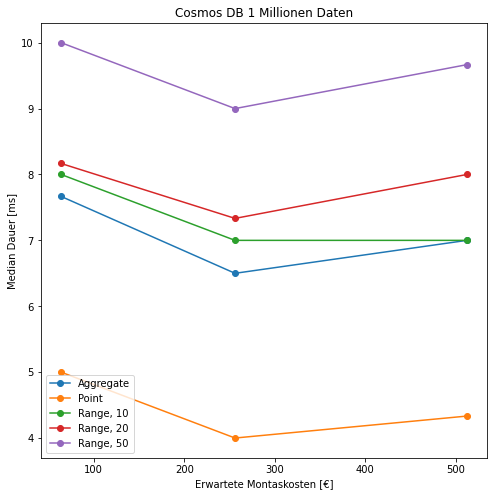

In [17]:
df_1Mil.groupby('QueryType')['Median'].plot(marker='o',  legend=True, xlabel='Erwartete Montaskosten [€]', ylabel='Median Dauer [ms]', figsize=(8,8),  title= 'Cosmos DB 1 Millionen Daten')
plt.savefig('./Plots/Cosmos_1Mil.png', bbox_inches='tight')

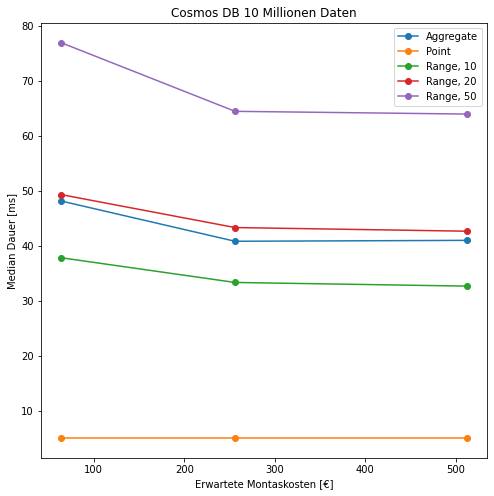

In [18]:
df_10Mil.groupby('QueryType')['Median'].plot(marker='o', legend=True, xlabel='Erwartete Montaskosten [€]',ylabel='Median Dauer [ms]', figsize=(8,8),  title= 'Cosmos DB 10 Millionen Daten')
plt.savefig('./Plots/Cosmos_10Mil.png', bbox_inches='tight')

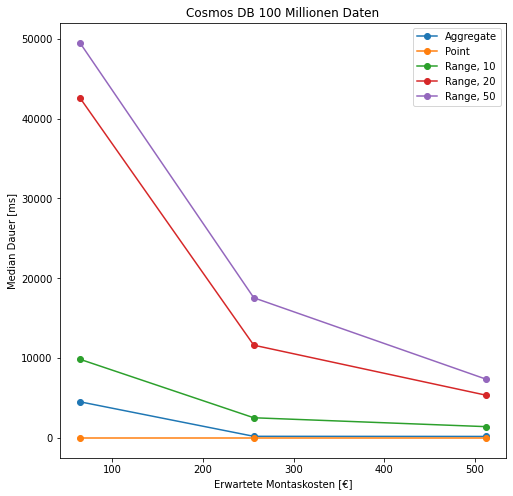

In [19]:
df_100Mil.groupby('QueryType')['Median'].plot(marker='o',  legend=True, xlabel='Erwartete Montaskosten [€]',ylabel='Median Dauer [ms]', figsize=(8,8), title= 'Cosmos DB 100 Millionen Daten')
plt.savefig('./Plots/Cosmos_100Mil.png', bbox_inches='tight')

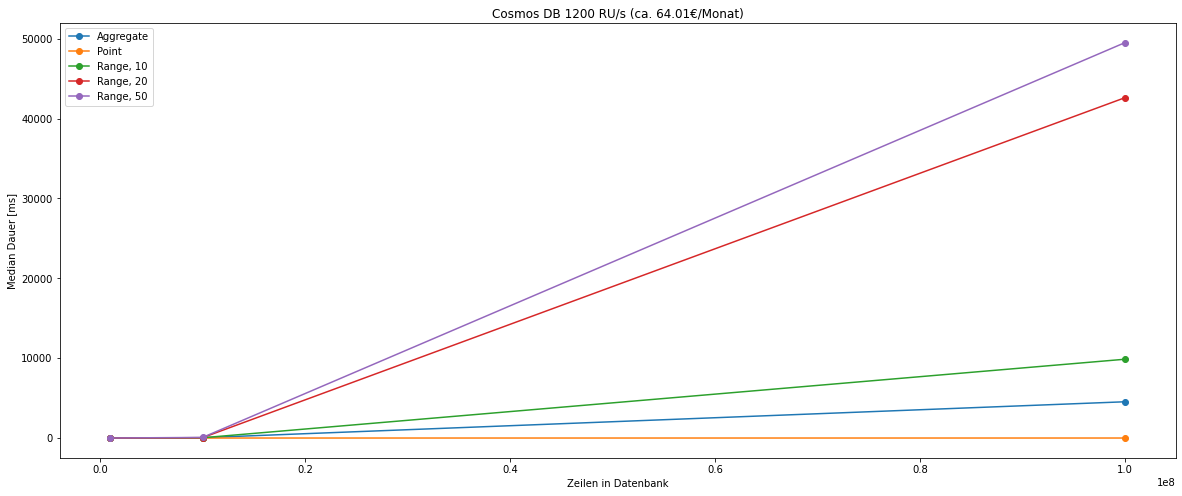

In [20]:
df_1200RUs.groupby('QueryType')['Median'].plot(marker='o',  legend=True, xlabel='Zeilen in Datenbank', ylabel='Median Dauer [ms]', figsize=(20,8), title= 'Cosmos DB 1200 RU/s (ca. 64.01€/Monat)')
plt.savefig('./Plots/Cosmos_1200RUs.png', bbox_inches='tight')

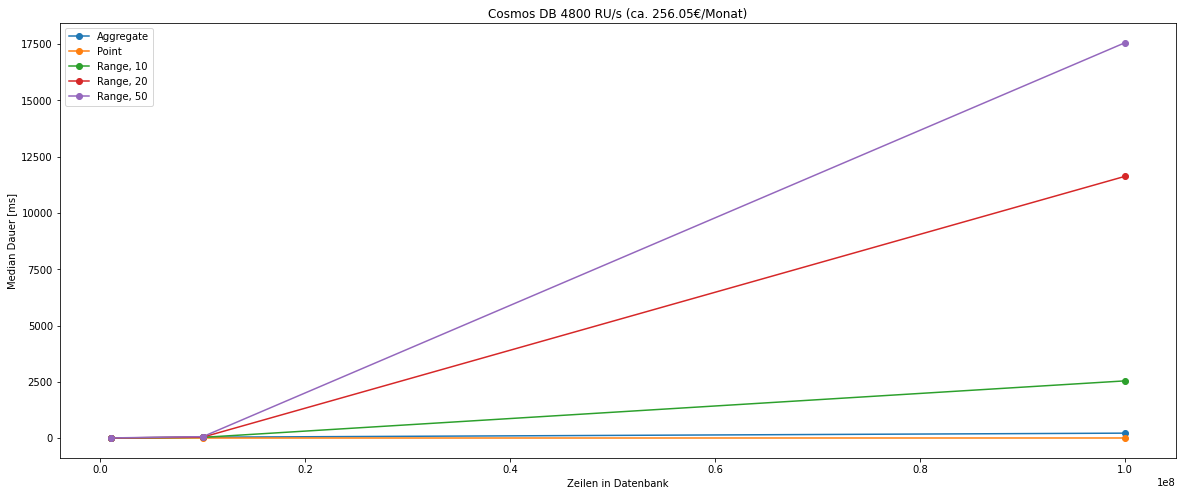

In [21]:
df_4800RUs.groupby('QueryType')['Median'].plot(marker='o',  legend=True, xlabel='Zeilen in Datenbank', ylabel='Median Dauer [ms]', figsize=(20,8), title= 'Cosmos DB 4800 RU/s (ca. 256.05€/Monat)')
plt.savefig('./Plots/Cosmos_4800RUs.png', bbox_inches='tight')

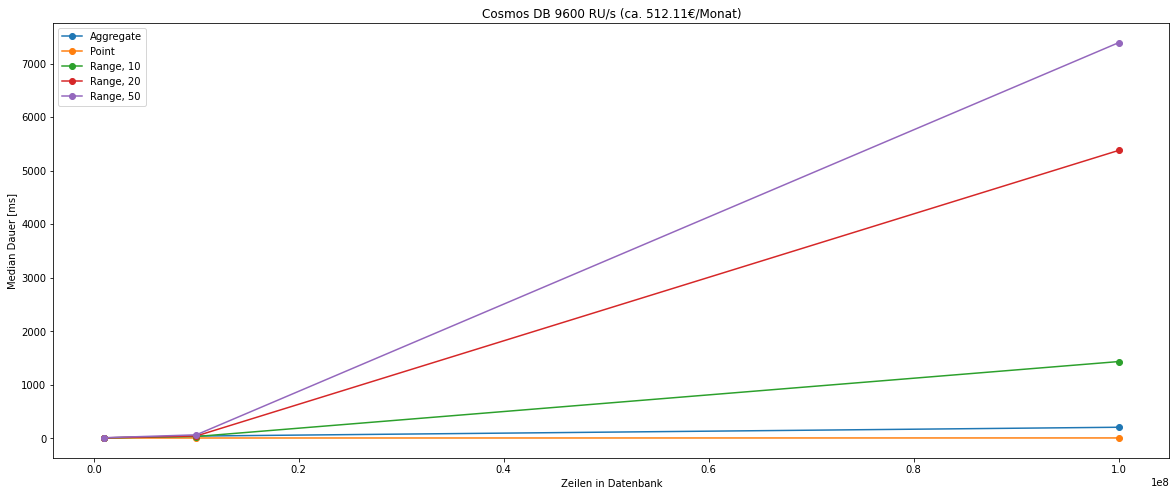

In [22]:
df_9600RUs.groupby('QueryType')['Median'].plot(marker='o',  legend=True, xlabel='Zeilen in Datenbank', ylabel='Median Dauer [ms]', figsize=(20,8), title= 'Cosmos DB 9600 RU/s (ca. 512.11€/Monat)')
plt.savefig('./Plots/Cosmos_9600RUs.png', bbox_inches='tight')